In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import trange,tqdm
sys.path.append('./include')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
np.set_printoptions(linewidth=120)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from IPython.display import display

# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

In [2]:
x=[]
T=[]
x.append(np.loadtxt('./data/Ising2D_config_L20.dat.gz'))
x.append(np.loadtxt('./data/Ising2D_config_L40.dat.gz'))
x.append(np.loadtxt('./data/Ising2D_config_L80.dat.gz'))
T.append(np.loadtxt('./data/Ising2D_temps_L20.dat'))
T.append(np.loadtxt('./data/Ising2D_temps_L40.dat'))
T.append(np.loadtxt('./data/Ising2D_temps_L80.dat'))

In [3]:
import scipy.linalg
N=[]
Σ=[]
λ,V =[],[]
for i in range(3):
    N.append(x[i].shape[0])
    x[i] -= np.average(x[i],axis=0)
    Σ.append(x[i].T @ x[i] / (N[i]-1))
    λ_t,V_t = scipy.linalg.eigh(Σ[i])
    λ.append(λ_t)
    V.append(V_t)

In [4]:
for i in range(3):
    λ[i] = λ[i][::-1]
    V[i] = np.flip(V[i],axis=1)

In [5]:
px = []
for i in range(3):
    px.append(x[i] @ V[i])


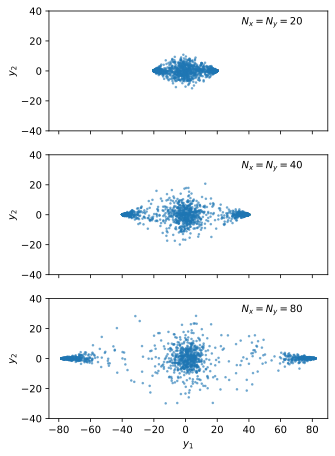

In [6]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(5,7.5))
nn = ['20','40','80']
ax[2].set_xlabel('$y_1$')
for i in range(3):
    ax[i].set_ylim([-40,40])
    ax[i].set_ylabel('$y_2$')
    ax[i].text(0.80,0.95,f'$N_x=N_y=${nn[i]}',horizontalalignment='center',verticalalignment='top', transform=ax[i].transAxes)
    ax[i].scatter(px[i][:,0],px[i][:,1], s=3, alpha=0.5)

At the smaller lattice sizes the feature grouping appears to be less distinguishable at each phase. We shall see if this is true once we color our points.


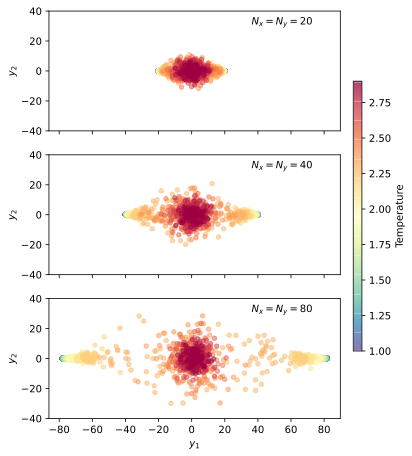

In [7]:
fig,ax = plt.subplots(3,1,sharex=True,figsize=(6,7.5))

ax[2].set_xlabel('$y_1$')
for i in range(3):
    ax[i].set_ylim([-40,40])
    ax[i].set_ylabel('$y_2$')
    ax[i].text(0.80,0.95,f'$N_x=N_y=${nn[i]}',horizontalalignment='center',verticalalignment='top', transform=ax[i].transAxes)
    scat = ax[i].scatter(px[i][:,0],px[i][:,1],c=T[i],cmap='Spectral_r', s=20, alpha=0.5)

fig.subplots_adjust(right=0.8) 
cbar_ax=fig.add_axes([0.83, 0.25, 0.02, 0.5])
cbar = fig.colorbar(scat,cax=cbar_ax,label='Temperature')

The phases are apparent in that they exist at the extrema of $|y_1|$. This matches the results of Wang Fig 2.

In [8]:
eigsum = np.zeros((3))

for i in range(3):
    eigsum[i]=np.sum(λ[i][0:9])
variance = np.zeros((3,10))
for i in range(3):
    for j in range(10):
        variance[i,j]=λ[i][j]/eigsum[i]
        

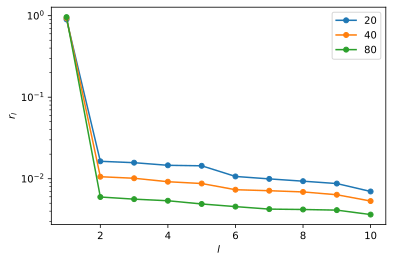

In [9]:
for i in range(3):
    plt.semilogy(range(1,11),variance[i,:],color=colors[i],markersize=5,marker='o')
plt.xlabel('$l$')
plt.ylabel('$r_l$')
plt.legend(['20', '40','80'], loc='best');

The Ising model's spin configurations are VERY well explained with only one dimension in PCA.